# Change Point Analysis

Change points are time points at which some feature of a data set changes. For detecting change points in a univariate time series we can use [`tsa.cp_pelt`](https://www.nag.com/numeric/py/nagdoc_latest/naginterfaces.library.tsa.html#naginterfaces.library.tsa.cp_pelt).
We wish to find changes in the mean of the time series

## Question:
**Can you detect the change points on the following plot?**

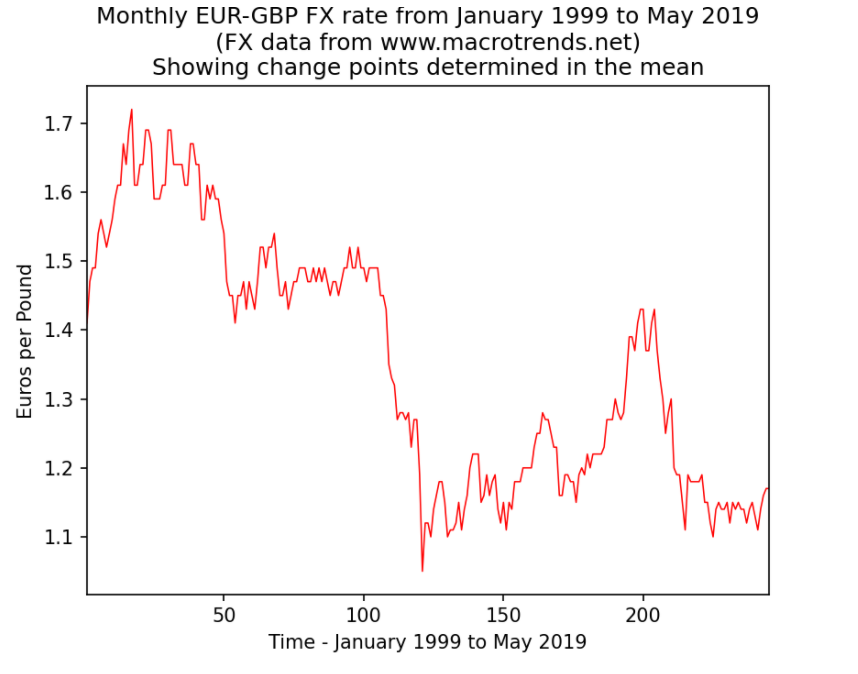

Consider the following time series, showing the EUR/GBP exchange rate between January 1999 and May 2019 (numbers indicate Euros per Pound, with FX data from www.macrotrends.net) stored in `y`.

In [4]:
y = [
1.41, 1.47, 1.49, 1.49, 1.54, 1.56, 1.54, 1.52, 1.54, 1.56, 1.59, 1.61,
1.61, 1.67, 1.64, 1.69, 1.72, 1.61, 1.61, 1.64, 1.64, 1.69, 1.69, 1.67,
1.59, 1.59, 1.59, 1.61, 1.61, 1.69, 1.69, 1.64, 1.64, 1.64, 1.64, 1.61,
1.61, 1.67, 1.67, 1.64, 1.64, 1.56, 1.56, 1.61, 1.59, 1.61, 1.59, 1.59,
1.56, 1.54, 1.47, 1.45, 1.45, 1.41, 1.45, 1.45, 1.47, 1.43, 1.47, 1.45,
1.43, 1.47, 1.52, 1.52, 1.49, 1.52, 1.52, 1.54, 1.49, 1.45, 1.45, 1.47,
1.43, 1.45, 1.47, 1.47, 1.49, 1.49, 1.49, 1.47, 1.47, 1.49, 1.47, 1.49,
1.47, 1.49, 1.47, 1.45, 1.47, 1.47, 1.45, 1.47, 1.49, 1.49, 1.52, 1.49,
1.49, 1.52, 1.49, 1.49, 1.47, 1.49, 1.49, 1.49, 1.49, 1.45, 1.45, 1.43,
1.35, 1.33, 1.32, 1.27, 1.28, 1.28, 1.27, 1.28, 1.23, 1.27, 1.27, 1.19,
1.05, 1.12, 1.12, 1.10, 1.14, 1.16, 1.18, 1.18, 1.15, 1.10, 1.11, 1.11,
1.12, 1.15, 1.11, 1.14, 1.16, 1.20, 1.22, 1.22, 1.22, 1.15, 1.16, 1.19,
1.16, 1.18, 1.19, 1.14, 1.12, 1.15, 1.11, 1.15, 1.14, 1.18, 1.18, 1.18,
1.20, 1.20, 1.20, 1.20, 1.23, 1.25, 1.25, 1.28, 1.27, 1.27, 1.25, 1.23,
1.23, 1.16, 1.16, 1.19, 1.19, 1.18, 1.18, 1.15, 1.19, 1.20, 1.19, 1.22,
1.20, 1.22, 1.22, 1.22, 1.22, 1.23, 1.27, 1.27, 1.27, 1.30, 1.28, 1.27,
1.28, 1.33, 1.39, 1.39, 1.37, 1.41, 1.43, 1.43, 1.37, 1.37, 1.41, 1.43,
1.37, 1.33, 1.30, 1.25, 1.28, 1.30, 1.20, 1.19, 1.19, 1.15, 1.11, 1.19,
1.18, 1.18, 1.18, 1.18, 1.19, 1.15, 1.15, 1.12, 1.10, 1.14, 1.15, 1.14,
1.14, 1.15, 1.12, 1.15, 1.14, 1.15, 1.14, 1.14, 1.12, 1.14, 1.15, 1.13,
1.11, 1.14, 1.16, 1.17, 1.17 ]

We wish to look for changes in the mean, which is selected using the following `ctype` value in the NAG routine

In [5]:
ctype = 1

We need to state the assumed variance of the time series data values, communicating it to the NAG function using the `param` keyword argument. Altering this value modifies the sensitivity of the algorithm to differences in the series values, and hence the number of change points detected.

In [6]:
param = [0.2]

Find the change points

In [7]:
from naginterfaces.library import tsa
soln = tsa.cp_pelt(ctype, y, param=param)

The locations of the change points are in attribute `tau` of the return tuple, while the estimated distribution parameters are in attribute `sparam`.

Here is a table of the results:

In [19]:
print(' -- Change Points --         --- Distribution ---')
print(' Number     Position              Parameters')
print('='*50)
for tau_i, tau_val in enumerate(soln.tau):
    print('{:4d}       {:6d}    {:12.2f}    {:12.2f}'.format(
        tau_i+1, tau_val, soln.sparam[0][tau_i], soln.sparam[1][tau_i],
    ))

 -- Change Points --         --- Distribution ---
 Number     Position              Parameters
   1           50            1.60            0.20
   2          109            1.47            0.20
   3          186            1.19            0.20
   4          210            1.34            0.20
   5          245            1.15            0.20


Plot the time series, and also the change points as vertical lines with the corresponding means as horizontal lines

<IPython.core.display.Javascript object>


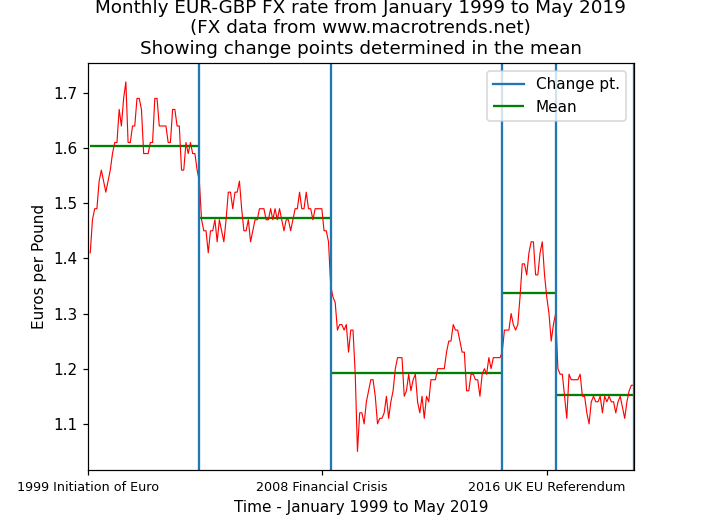

In [13]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('nbagg')
plt.plot(range(1, len(y)+1), y, color='r', linewidth=0.75)
last_cp = 1.
for tau_i, tau_val in enumerate(soln.tau):
    vl = plt.axvline(tau_val, label='Change pt.')
    hl = plt.hlines(
        soln.sparam[0][tau_i],
        xmin=last_cp, xmax=tau_val, color='g', label='Mean',
    )
    last_cp = tau_val
plt.xlim((1, len(y)))
t11 = ['1999 Initiation of Euro', '2008 Financial Crisis', '2016 UK EU Referendum']
t12 = (0, soln.tau[1]-4, soln.tau[3]-4)
plt.xticks(t12, t11, size='small')
plt.xlabel('Time - January 1999 to May 2019')
plt.ylabel('Euros per Pound')
plt.title(
    'Monthly EUR-GBP FX rate from January 1999 to May 2019\n'
    '(FX data from www.macrotrends.net)\n'
    'Showing change points determined in the mean')
plt.legend(handles=[vl, hl], loc='upper right')
plt.show()